In [2]:
## 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import warnings
import random
import time
warnings.filterwarnings('ignore')
##  读取数据
url = r'D:\\0_0.3CC\without_ID_0.3cc_0.7（seed100）_T.csv'
df = pd.read_csv(url)
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
y = df_sc['TSS']
X = df_sc.drop('TSS', axis=1) # becareful inplace= False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

AttributeError: 'Lasso' object has no attribute 'alpha_'

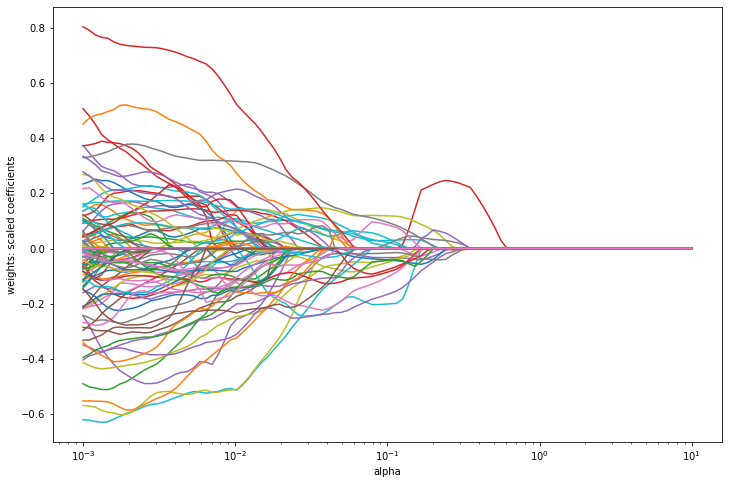

In [6]:
alpha_lasso = 10**np.linspace(-3,1,100)
lasso = Lasso()
coefs_lasso = []
for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')

plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
#plt.title('Lasso regression coefficients Vs. alpha')
#plt.legend(df.drop('FSS',axis=1, inplace=False).columns)
plt.axvline(lasso.alpha_,color = "black",ls="--") 
plt.show()

In [4]:
lasso = Lasso(alpha=10**(-1))
model_lasso = lasso.fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_,index=X_train.columns)
print((coef[coef != 0]).abs().sort_values(ascending = True))
print(X_train.columns[coef != 0])

DWI_wavelet-HHH_glrlm_ShortRunLowGrayLevelEmphasis        0.007925
ADC_wavelet-LLL_firstorder_Median                         0.015879
DWI_wavelet-LLL_glrlm_ShortRunEmphasis                    0.016589
ADC_wavelet-HHL_firstorder_Skewness                       0.021920
DWI_original_firstorder_Skewness                          0.029454
DWI_wavelet-HLL_glrlm_RunVariance                         0.032667
DWI_wavelet-LLL_gldm_DependenceNonUniformityNormalized    0.037219
DWI_wavelet-HLL_firstorder_Median                         0.040330
ADC_wavelet-LHL_glrlm_GrayLevelVariance                   0.041138
ADC_wavelet-HLH_glrlm_LongRunEmphasis                     0.043536
DWI_wavelet-HLL_glszm_LargeAreaLowGrayLevelEmphasis       0.050417
ADC_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized     0.076603
ADC_original_glcm_ClusterShade                            0.085575
ADC_wavelet-HLH_glrlm_ShortRunEmphasis                    0.085829
ADC_wavelet-HHL_glcm_InverseVariance                      0.09

In [5]:
import pandas as pd
import xlsxwriter
dataFile = "D:\\0_0.3CC\without_ID_0.3cc_0.7（seed100）_T.csv"
a = pd.read_csv(dataFile)
b = a[['TSS','DWI_original_firstorder_Skewness',
       'DWI_original_glrlm_LongRunEmphasis',
       'DWI_wavelet-HLL_firstorder_Median',
       'DWI_wavelet-HLL_glrlm_RunVariance',
       'DWI_wavelet-HLL_glszm_LargeAreaLowGrayLevelEmphasis',
       'DWI_wavelet-HHH_glrlm_ShortRunLowGrayLevelEmphasis',
       'DWI_wavelet-LLL_glcm_MCC',
       'DWI_wavelet-LLL_gldm_DependenceNonUniformityNormalized',
       'DWI_wavelet-LLL_glrlm_ShortRunEmphasis',
       'ADC_original_firstorder_10Percentile',
       'ADC_original_glcm_ClusterShade',
       'ADC_wavelet-LHL_glcm_DifferenceVariance',
       'ADC_wavelet-LHL_glrlm_GrayLevelVariance',
       'ADC_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized',
       'ADC_wavelet-HLH_glrlm_LongRunEmphasis',
       'ADC_wavelet-HLH_glrlm_ShortRunEmphasis',
       'ADC_wavelet-HHL_firstorder_Skewness',
       'ADC_wavelet-HHL_glcm_InverseVariance',
       'ADC_wavelet-LLL_firstorder_Median']]
b.to_csv("D:\\0_0.3CC\without_ID_0.3cc_0.7（seed100）_T_LASSO.csv")